<a href="https://colab.research.google.com/github/Best-forever-003/FINAL-YEAR-PROJECT/blob/main/COVID_19_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT : Covid-19 Detection**

# **AUTHOR  : Joan Miracle J and Fahadh Mohamed J**

# **ORGANISATION : Panimalar Engineering College**

# **FINAL YEAR PROJECT** 

# **COVID-19 Detection on X-Ray Images**

## **1. Importing the Training & Test Dataset**

In [ ]:
!wget http://cb.lk/covid_19

--2022-04-13 08:17:36--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 172.67.187.81, 104.21.72.203, 2606:4700:3032::ac43:bb51, ...
Connecting to cb.lk (cb.lk)|172.67.187.81|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2022-04-13 08:17:36--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|172.67.187.81|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2022-04-13 08:17:36--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2022-04

## **2. Unzip The File**

In [ ]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_

In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

## **3. Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

## **4. Buiding the CNN Architecture**

In [ ]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


## **5. Model Summary**

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

## **6. Data Augmentation, Normalizing Data & Training the Model**

In [ ]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
7/7 [==============================] - 71s 10s/step - loss: 1.0959 - accuracy: 0.5357 - val_loss: 0.6801 - val_accuracy: 0.8833
Epoch 2/10
7/7 [==============================] - 72s 10s/step - loss: 0.6260 - accuracy: 0.6652 - val_loss: 0.5561 - val_accuracy: 0.9000
Epoch 3/10
7/7 [==============================] - 68s 10s/step - loss: 0.4144 - accuracy: 0.8080 - val_loss: 0.3659 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 73s 10s/step - loss: 0.3499 - accuracy: 0.8482 - val_loss: 0.3483 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 70s 10s/step - loss: 0.2997 - accuracy: 0.9152 - val_loss: 0.2567 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 76s 10s/step - loss: 0.2111 - accuracy: 0.9196 - val_loss: 0.1674 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 70s 10s/step - loss: 0.2010 - accuracy: 0.9196 - val_loss: 0.0839 - val_accuracy: 0.9833
Epoch 8/10
7/7 [===========

In [ ]:
model.save("model_adv.h5")

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.08503128588199615, 0.96875]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.04259404167532921, 0.9833333492279053]

## **7. Model Evaluation**

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
import os

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
from PIL import Image
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  y_test.append(p[0,0])
  y_actual.append(0)

## **8. Confusion Matrix**

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
cm = confusion_matrix(y_actual, y_test.round())

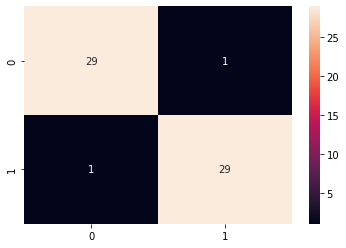

In [ ]:
import seaborn as sns
sns.heatmap(cm, cmap=None, annot=True)

## **9. Plotting Training & Validation Loss**

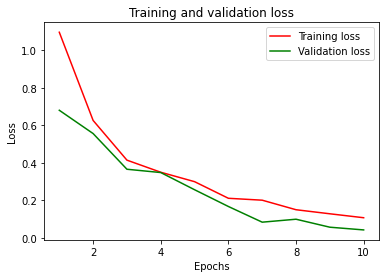

In [ ]:
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **10. Plotting Training & Validation Accuracy**

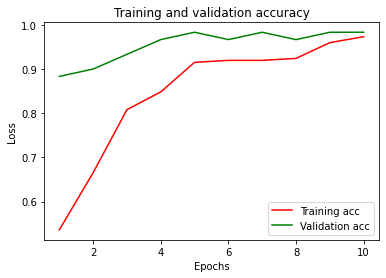

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **11. Some Comparative Results of Radiologist vs CNN Model on Validation set**

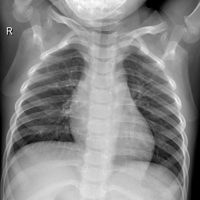

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


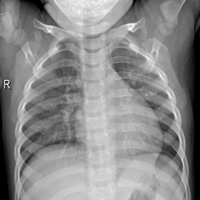

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


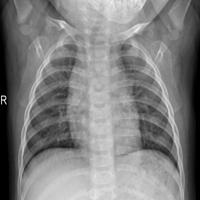

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


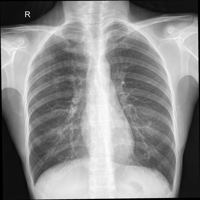

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


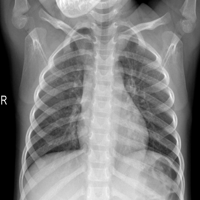

Radiologist: COVID-19 -ve
CNN Model: COVID-19 -ve


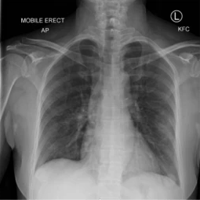

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


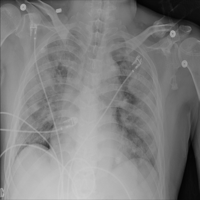

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


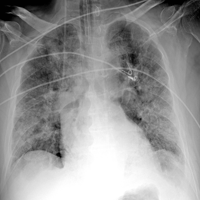

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


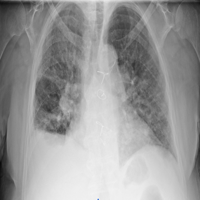

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


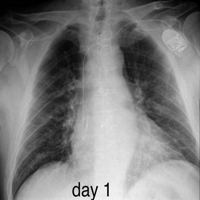

Radiologist: COVID-19 +ve
CNN Model: COVID-19 +ve


In [ ]:
class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   
from PIL import Image
j = 0
for i in os.listdir("./CovidDataset/Val/Normal/"):
  j = j+1
  pil_img = Image.open('./CovidDataset/Val/Normal/'+i)
  im = pil_img
  size = (200,200) #image size
  
  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./CovidDataset/Val/Normal/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)

  if p==0:
    print(color.RED + 'CNN Model: COVID-19 +ve' + color.RED)
  else:
    print("CNN Model: COVID-19 -ve")
  if (j==5):
    break

from PIL import Image
j = 0
for i in os.listdir("./CovidDataset/Val/Covid/"):
  j = j+1
  pil_img = Image.open('./CovidDataset/Val/Covid/'+i)
  im = pil_img
  size = (200,200) #image size

  #resize image
  out = im.resize(size)
  display(out)
  img = image.load_img("./CovidDataset/Val/Covid/"+i, target_size = (224, 224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict(img)
  print(color.RED + 'Radiologist: COVID-19 +ve' + color.RED)
  if p==0:
    print("CNN Model: COVID-19 +ve")
  else:
    print(color.GREEN + 'Radiologist: COVID-19 -ve' + color.GREEN)
  if (j==5):
    break